<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/8thWeekTask%20(UTS)/UTS_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kneed

# **Libraries**

In [ ]:
# import library yang dibutuhkan
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from kneed import KneeLocator

from sklearn.datasets import make_blobs

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform


sns.set_theme()

# **Menggunakan dataset dan melakukan cleaning**

In [ ]:
# tarik dataset
dataset = pd.read_csv(
    'sample_data/online_shoppers_intention.csv',
    delimiter=',',
    na_values=['NA', 'missing', ' '],
    decimal=','
)

In [ ]:
# Mengonversi kolom 'BounceRates' menjadi tipe data numerik.
dataset['BounceRates'] = pd.to_numeric(dataset['BounceRates'], errors='coerce')

# Mengonversi kolom 'ExitRates' menjadi tipe data numerik.
dataset['ExitRates'] = pd.to_numeric(dataset['ExitRates'], errors='coerce')


In [ ]:
# Menghapus baris yang memiliki nilai NaN pada kolom 'BounceRates' atau 'ExitRates'.
dataset.dropna(subset=['BounceRates', 'ExitRates'], inplace=True)


# **Standarisasi Data**

In [ ]:
# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset[['BounceRates', 'ExitRates']])

# Buat DataFrame dari data yang distandarisasi
data_scaled = pd.DataFrame(data_scaled, columns=['BounceRates', 'ExitRates'])

# **Visualisasi**

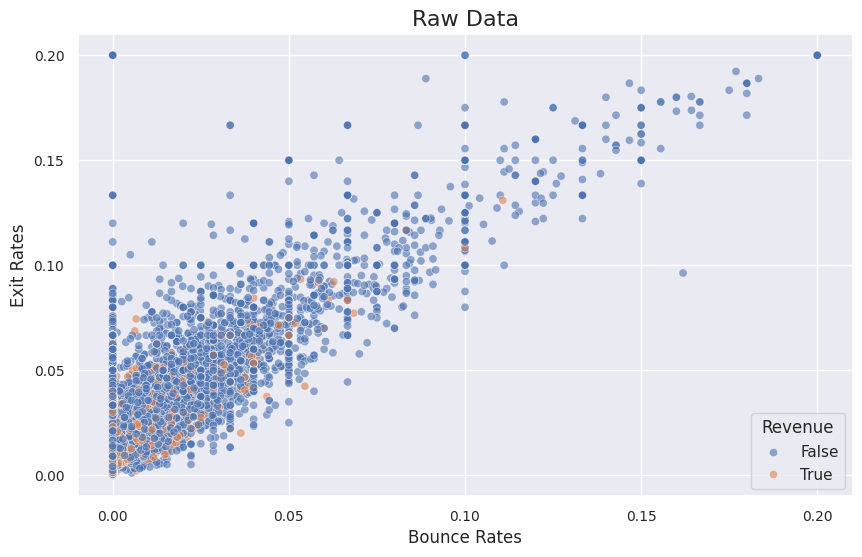

In [ ]:
plt.figure(figsize=(10, 6))

# Scatterplot
sns.scatterplot(
    data=dataset,
    x='BounceRates',
    y='ExitRates',
    hue='Revenue',
    alpha=0.6  # Transparansi untuk mengurangi tumpukan
)

# Tambahkan judul
plt.title('Raw Data', fontsize=16)

# Batasi jumlah label pada sumbu
plt.xticks(ticks=np.linspace(dataset['BounceRates'].min(), dataset['BounceRates'].max(), 5), fontsize=10)
plt.yticks(ticks=np.linspace(dataset['ExitRates'].min(), dataset['ExitRates'].max(), 5), fontsize=10)

# Tambahkan label sumbu
plt.xlabel('Bounce Rates', fontsize=12)
plt.ylabel('Exit Rates', fontsize=12)

# Tampilkan legenda dengan judul
plt.legend(title='Revenue')
plt.show()


Visualisasi raw data dengan scatterplot memberikan gambaran yang jelas tentang hubungan antar variabel dalam dataset. Ini adalah langkah pertama dalam eksplorasi data yang akan membantu untuk menentukan apakah ada pola atau klaster yang menonjol sebelum melanjutkan ke tahap analisis yang lebih kompleks seperti clustering.

In [ ]:
# Daftar jumlah klaster
num_clusters = [2, 3, 4, 5, 6]

# List untuk menyimpan inertia dan hasil clustering
inertia_list = []
clustering_result_list = []

# K-Means clustering untuk berbagai jumlah klaster
for n_clusters in num_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans.fit(data_scaled)

    # Simpan inertia
    inertia_list.append(kmeans.inertia_)

    # Simpan hasil clustering
    clustering_result = data_scaled.copy()
    clustering_result['clusters'] = kmeans.labels_
    clustering_result['cluster_num'] = n_clusters
    clustering_result_list.append(clustering_result)

# Gabungkan semua hasil clustering
merged_clustering_result = pd.concat(clustering_result_list, axis=0, ignore_index=True)

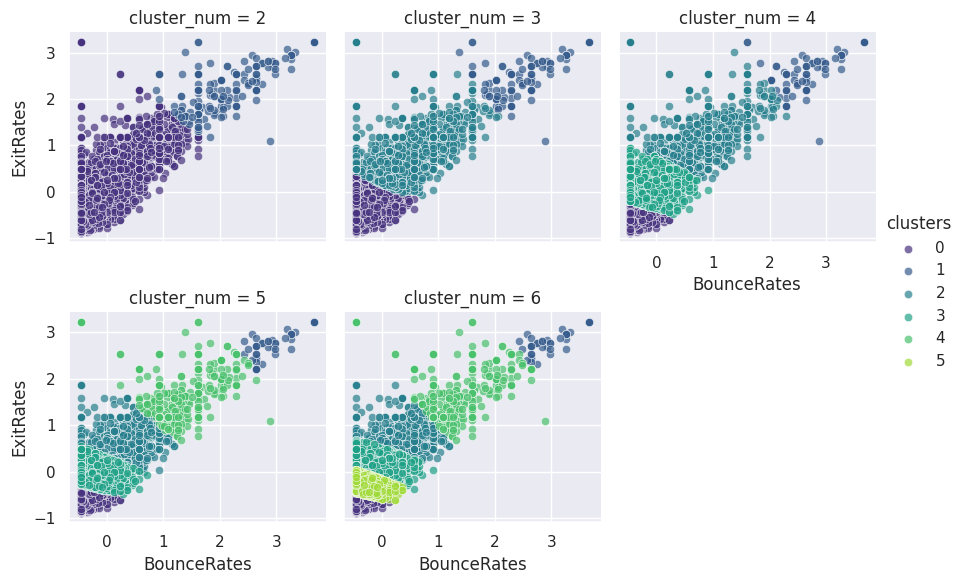

In [ ]:
# Visualisasi clustering untuk berbagai jumlah klaster
g = sns.FacetGrid(
    merged_clustering_result,
    col="cluster_num",
    col_wrap=3,
    hue="clusters",
    palette="viridis",
    sharex=True,
    sharey=True
)
g.map(
    sns.scatterplot,
    'BounceRates',
    'ExitRates',
    alpha=0.7
)
g.add_legend()

# Tampilkan plot
plt.show()


dilakukan clustering dengan algoritma K-Means untuk jumlah klaster yang berbeda (2 hingga 6 klaster). Setiap hasil clustering disimpan dan digabungkan untuk divisualisasikan. Visualisasi menggunakan FacetGrid menunjukkan scatterplot yang memetakan data berdasarkan BounceRates dan ExitRates, dengan warna berbeda untuk setiap klaster. Visualisasi ini membantu untuk mengevaluasi pemisahan data dan memilih jumlah klaster yang optimal.

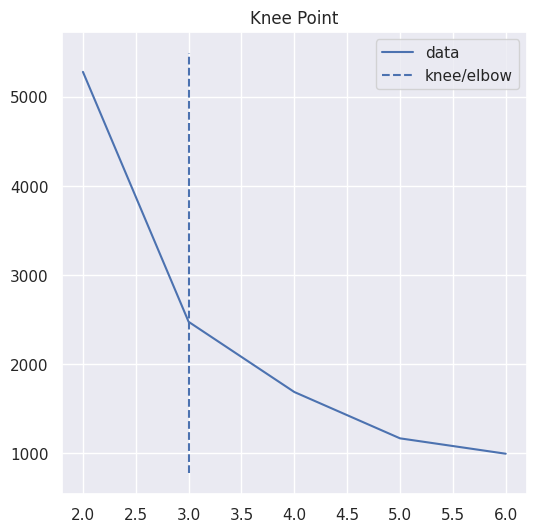

In [ ]:
# melihat elbow poin
kneedle = KneeLocator(
    num_clusters,
    inertia_list,
    curve="convex",
    direction="decreasing"
)
kneedle.plot_knee()

untuk menemukan elbow point pada grafik inertia dalam analisis K-Means clustering. Elbow point adalah titik pada grafik yang menunjukkan jumlah klaster optimal di mana penurunan inertia mulai melambat.

In [ ]:
# Gunakan hanya kolom BounceRates dan ExitRates untuk clustering
cluster_data = dataset[['BounceRates', 'ExitRates']]


In [ ]:
# Standarisasi data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

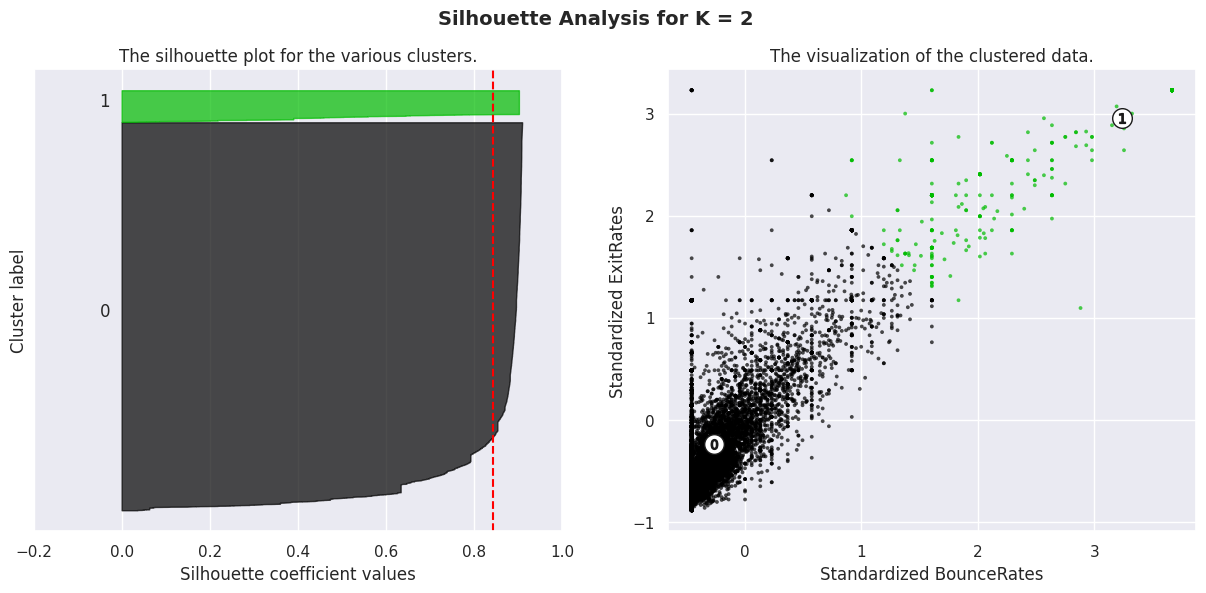

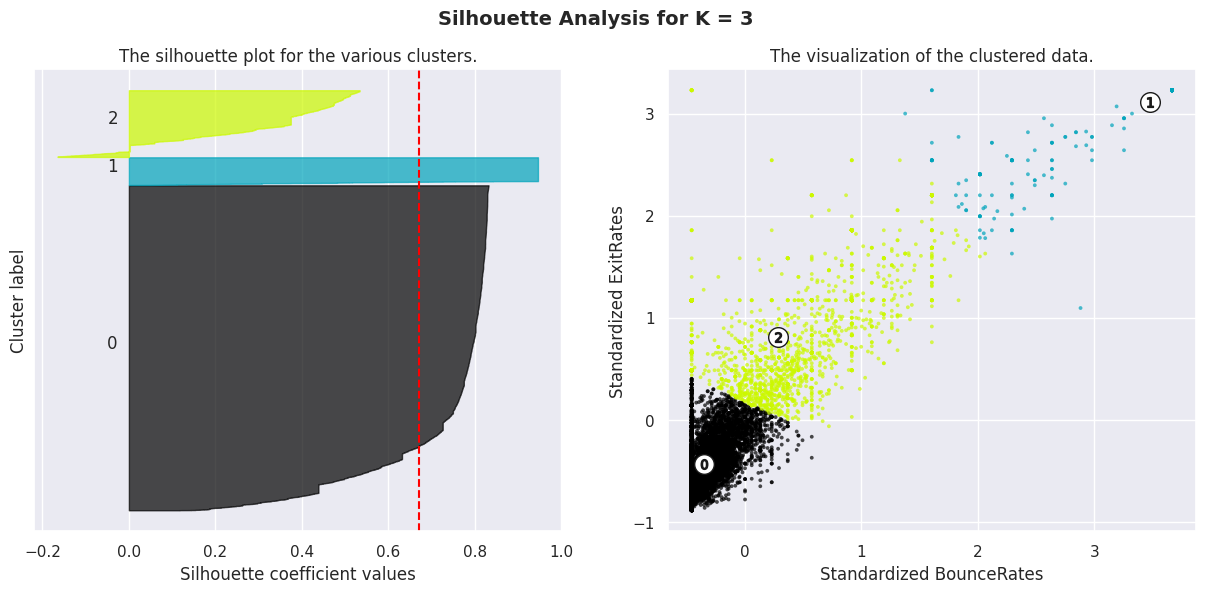

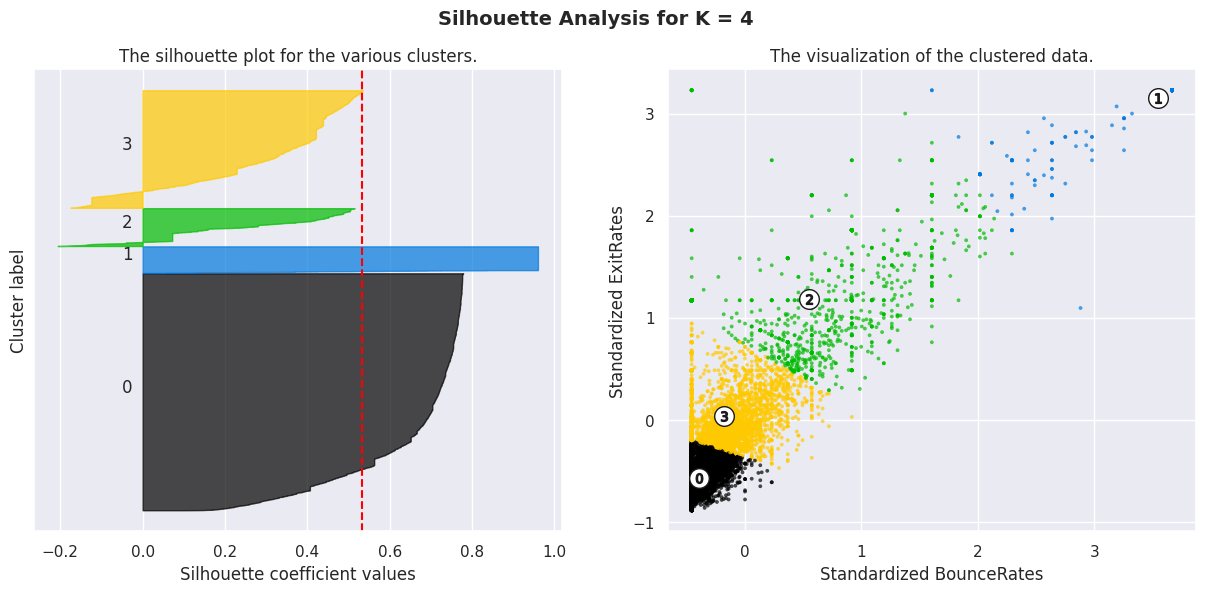

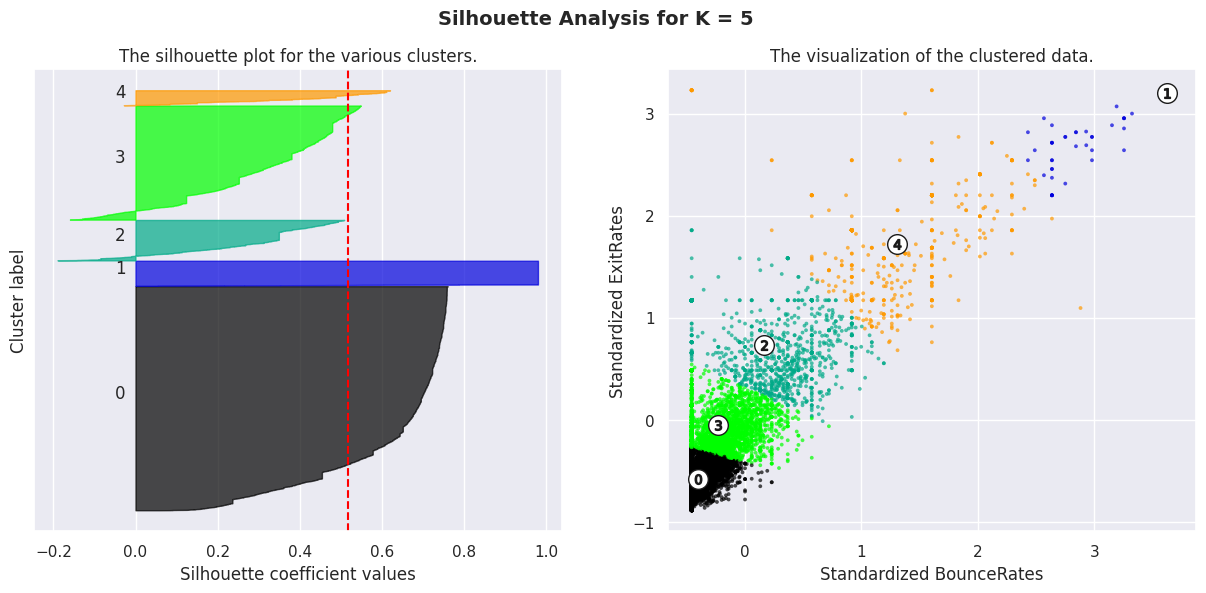

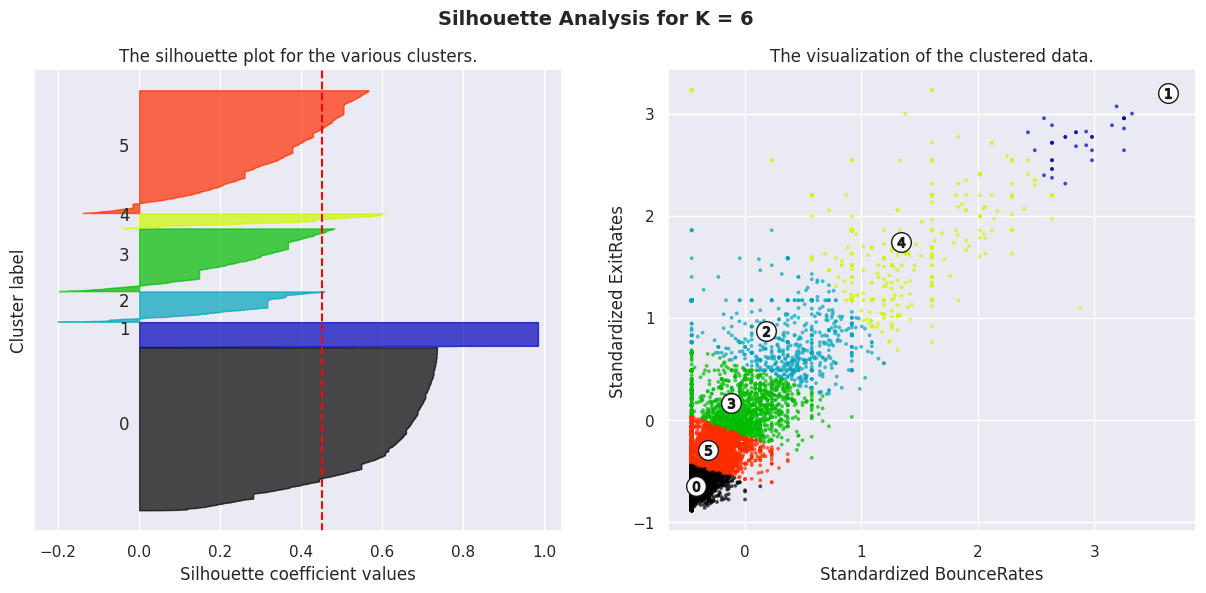

In [ ]:
# Nilai K yang akan diuji
num_clusters = [2, 3, 4, 5, 6]

# Simpan silhouette score rata-rata untuk setiap K
silhouette_score_list = []

for num_clust in num_clusters:
    # Clustering menggunakan K-Means
    kmeans = KMeans(n_clusters=num_clust, n_init='auto', random_state=42)
    kmeans.fit(cluster_data_scaled)

    # Hitung silhouette score rata-rata
    silhouette_avg = silhouette_score(cluster_data_scaled, kmeans.labels_)
    silhouette_score_list.append(silhouette_avg)

    # Hitung nilai silhouette untuk setiap data poin
    sample_silhouette_values = silhouette_samples(cluster_data_scaled, kmeans.labels_)

    # Plot silhouette scores dan scatterplot clustering
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(
        f"Silhouette Analysis for K = {num_clust}",
        fontsize=14,
        fontweight="bold"
    )

    # 1. Silhouette plot
    y_lower = 10
    for i in range(num_clust):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clust)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2. Scatterplot of clustered data
    colors = cm.nipy_spectral(kmeans.labels_.astype(float) / num_clust)
    ax2.scatter(
        cluster_data_scaled[:, 0],
        cluster_data_scaled[:, 1],
        marker='.',
        s=30,
        lw=0,
        alpha=0.7,
        c=colors,
        edgecolor='k'
    )

    centers = kmeans.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker='o',
        c='white',
        alpha=1,
        s=200,
        edgecolor='k'
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Standardized BounceRates")
    ax2.set_ylabel("Standardized ExitRates")

    plt.show()


dilakukan analisis silhouette untuk mengevaluasi hasil clustering menggunakan K-Means dengan berbagai jumlah klaster (K). Proses dimulai dengan menentukan beberapa nilai K yang akan diuji, yaitu 2 hingga 6 klaster. Setiap nilai K diuji untuk mengetahui seberapa baik K-Means dapat mengelompokkan data.

Untuk setiap jumlah klaster, K-Means digunakan untuk mengelompokkan data yang sudah distandarisasi. Setelah itu, nilai rata-rata silhouette score dihitung untuk menilai seberapa baik titik data cocok dengan klaster yang dihasilkan. Semakin tinggi nilai silhouette score, semakin baik kualitas clustering-nya. Nilai ini disimpan untuk setiap jumlah klaster yang diuji.

Selain menghitung nilai rata-rata, kode ini juga menghitung nilai silhouette untuk setiap titik data, yang memberikan gambaran lebih detail mengenai seberapa baik titik data tersebut cocok dengan klaster tempat mereka berada.

Kemudian, untuk visualisasi hasil clustering, dua plot ditampilkan. Plot pertama adalah silhouette plot yang menunjukkan distribusi nilai silhouette untuk setiap klaster. Setiap klaster diberi warna berbeda, dengan garis vertikal merah yang menunjukkan nilai rata-rata silhouette untuk jumlah klaster tersebut. Nilai silhouette yang lebih tinggi menunjukkan bahwa klaster lebih baik terpisah, dan data dalam klaster tersebut lebih homogen.

Plot kedua adalah scatterplot yang menampilkan data yang telah dikelompokkan. Setiap titik pada plot ini diberi warna sesuai dengan klaster yang dihasilkan, dan titik pusat setiap klaster digambarkan dengan warna putih serta dilingkari untuk menunjukkan posisi rata-rata klaster tersebut.

Dengan analisis dan visualisasi ini, kita dapat menilai kualitas clustering secara keseluruhan dan melihat bagaimana data terbagi ke dalam klaster-klaster yang berbeda berdasarkan fitur yang digunakan, seperti 'BounceRates' dan 'ExitRates'.

Text(0, 0.5, 'Silhouette score value')

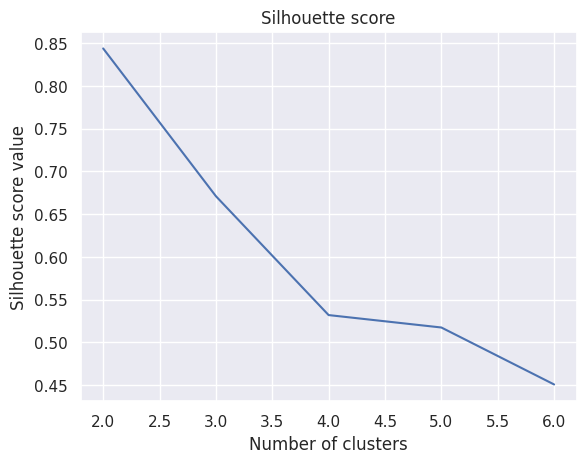

In [ ]:
# Overall siluethe scores
plt.plot(num_clusters, silhouette_score_list)
plt.title('Silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score value')

dilakukan visualisasi overall silhouette score untuk berbagai jumlah klaster yang diuji sebelumnya (yaitu 2 hingga 6 klaster). Grafik ini menggambarkan hubungan antara jumlah klaster dan nilai silhouette score, semakin tinggi nilai silhouette maka cluster tersebut lebih baik.

# **Visualisasi dengan data artifisial**

In [ ]:
# Data artifisial menggunakan make_blobs dengan 6 klaster
X, y_true = make_blobs(
    n_samples=500, centers=6, cluster_std=0.60, random_state=1
)
artificial_df = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])

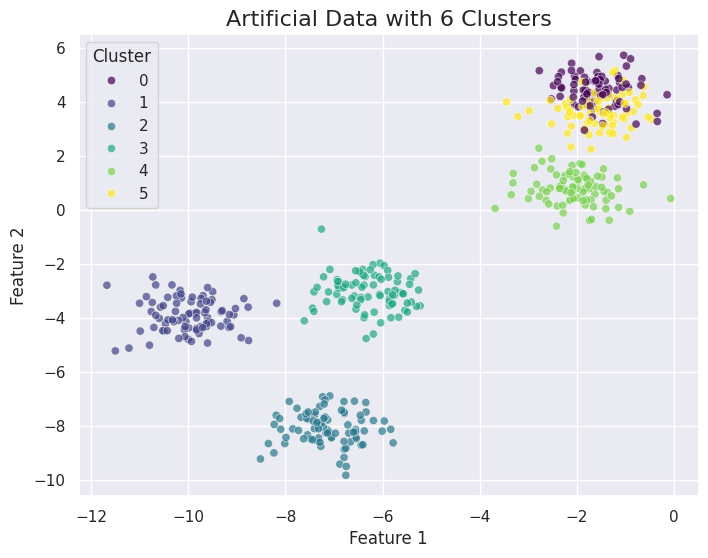

In [ ]:
# Visualisasi data artifisial dengan 6 klaster
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=artificial_df,
    x='Feature 1',
    y='Feature 2',
    hue=y_true,
    palette='viridis',
    alpha=0.7
)
plt.title('Artificial Data with 6 Clusters', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

Gambar ini menunjukkan visualisasi data artifisial dengan enam klaster yang sebagian besar terpisah satu sama lain. Namun, setelah melihat lebih dekat, terlihat bahwa tidak semua klaster benar-benar terpisah. Terdapat tumpang tindih yang signifikan antara klaster kuning dan ungu, di mana beberapa titik dari kedua klaster bercampur di area yang sama. Hal ini menunjukkan bahwa pemisahan antara kedua klaster ini kurang tegas.

Text(0, 0.5, 'ExitRates')

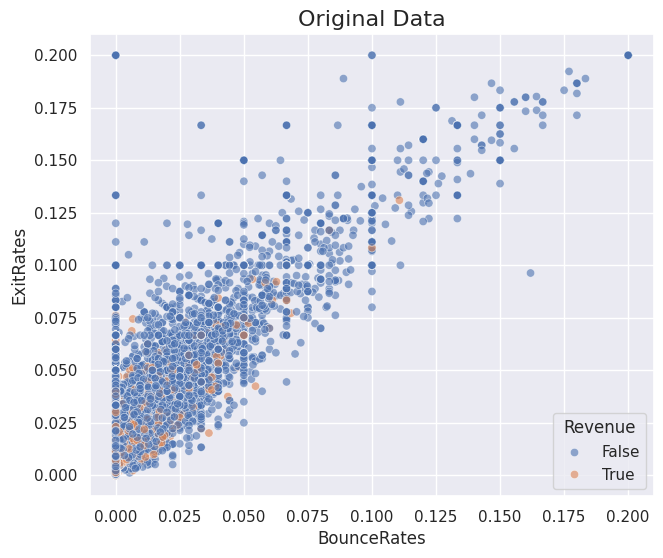

In [ ]:
# Gabungkan data asli dan data artifisial dalam satu visualisasi untuk perbandingan
plt.figure(figsize=(16, 6))

# Subplot 1: Data asli
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=dataset,
    x='BounceRates',
    y='ExitRates',
    hue='Revenue',
    alpha=0.6
)
plt.title('Original Data', fontsize=16)
plt.xlabel('BounceRates', fontsize=12)
plt.ylabel('ExitRates', fontsize=12)

Gambar ini menunjukkan distribusi data yang berkaitan dengan dua variabel, yaitu BounceRates (pada sumbu X) dan ExitRates (pada sumbu Y). Data dibagi berdasarkan atribut Revenue, yang merepresentasikan apakah ada pendapatan (label "True") atau tidak (label "False"). Titik-titik pada scatterplot ini diberi warna berbeda untuk membedakan dua kategori tersebut: biru untuk "False" dan oranye untuk "True."

Secara keseluruhan, sebagian besar data berada di area dekat asal koordinat (nilai rendah pada kedua sumbu). Ini menunjukkan bahwa banyak sesi memiliki BounceRates dan ExitRates yang relatif rendah. Titik-titik yang dikaitkan dengan "Revenue = True" (oranye) terlihat lebih jarang dan tersebar di antara data "Revenue = False" (biru), yang menunjukkan bahwa hanya sebagian kecil dari sesi menghasilkan pendapatan.

Ada juga pola hubungan antara BounceRates dan ExitRates yang terlihat linear, di mana nilai ExitRates cenderung meningkat seiring dengan peningkatan BounceRates. Hal ini mungkin mengindikasikan hubungan langsung antara kedua variabel tersebut.

In [ ]:
# Different numbers of k to try out
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Storage for inertia value
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []
# List used to store clustering results
clustering_result_list = []

In [ ]:
# Perform clustering for different number of clusters
for num_clust in num_clusters:
    # Perform k means clustering
    kmeans = KMeans(n_clusters=num_clust, n_init='auto', random_state=42)
    kmeans.fit(artificial_df)

    # Calculate and store inertia & silhouette score
    inertia_list.append(kmeans.inertia_)
    silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
    silhouette_score_list.append(silhouette_scr)

    # Add clustering result to list
    current_clustering = artificial_df.copy()
    current_clustering['clusters'] = kmeans.labels_
    current_clustering['cluster_num'] = num_clust
    clustering_result_list.append(current_clustering)

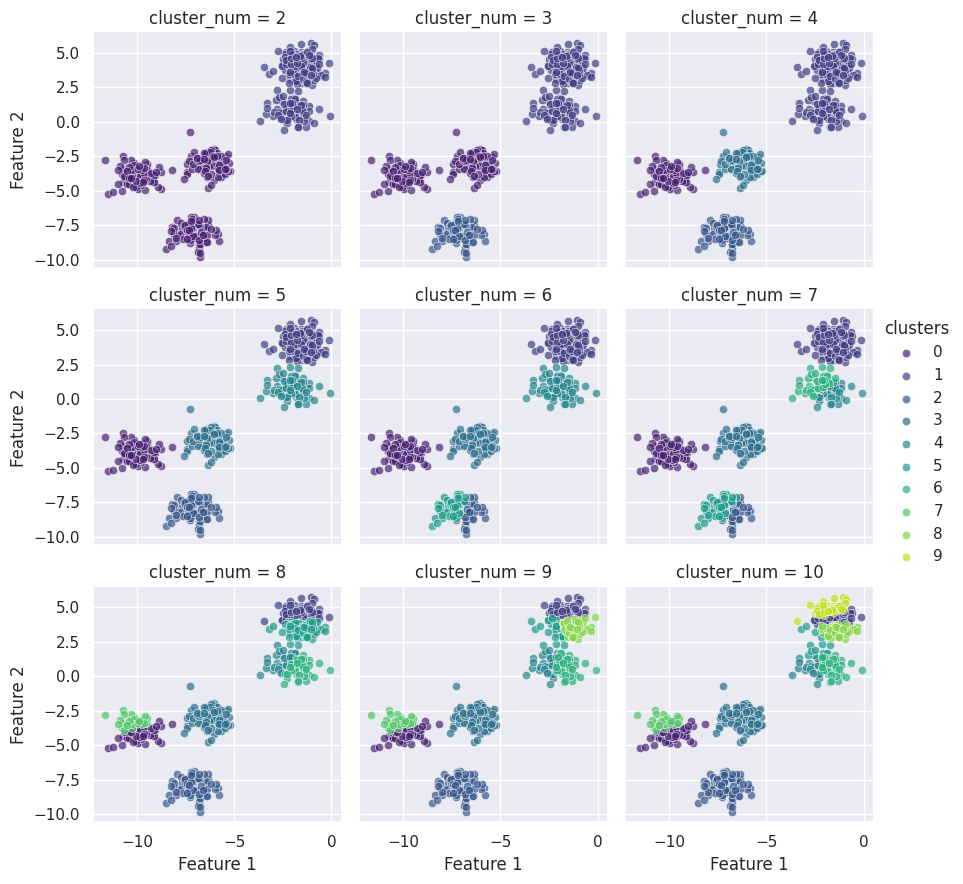

In [ ]:
# Merge results for all values of num_clust
merged_clustering_result = pd.concat(
    clustering_result_list,
    axis=0,
    ignore_index=True
)

# Plot all clusterings
g = sns.FacetGrid(
    merged_clustering_result,
    col="cluster_num",
    col_wrap=3,
    hue="clusters",
    palette="viridis",
    sharex=True,
    sharey=True
)
g.map(
    sns.scatterplot,
    'Feature 1',
    'Feature 2',
    alpha=0.7
)
g.add_legend()

# Display the clustering visualizations
plt.show()




 menampilkan hasil visualisasi clustering dengan berbagai jumlah klaster (dari 2 hingga 10) menggunakan K-Means. Pada setiap subplot, data dua dimensi diplot dengan Feature 1 pada sumbu-x dan Feature 2 pada sumbu-y.

Setiap warna mewakili klaster yang terbentuk, sesuai dengan jumlah klaster (cluster_num) yang dicoba. Ketika jumlah klaster meningkat, data terbagi menjadi lebih banyak kelompok dengan batas-batas yang lebih terperinci. Visualisasi ini membantu memahami bagaimana data dikelompokkan dalam berbagai konfigurasi klastering, dan dapat digunakan untuk menentukan jumlah klaster optimal.

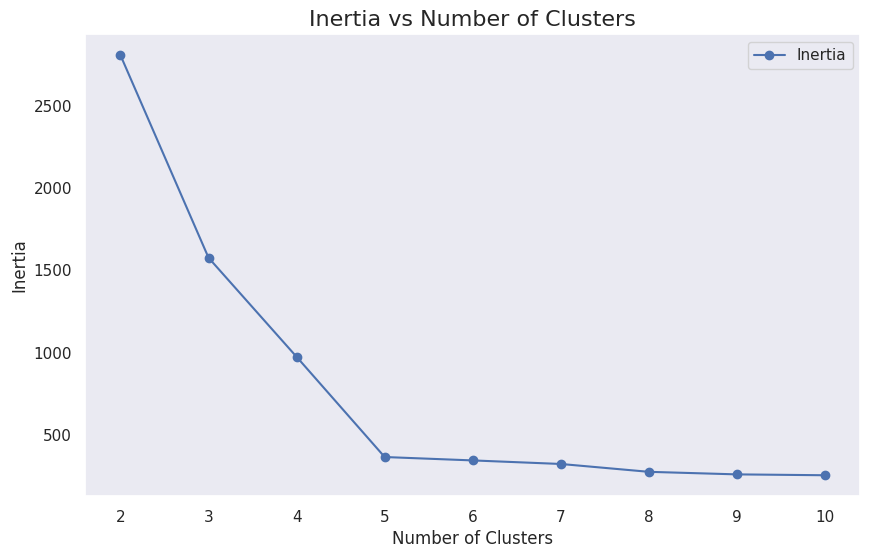

In [ ]:
# Plot inertia for all cluster counts
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertia_list, marker='o', label='Inertia')
plt.title('Inertia vs Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid()
plt.legend()
plt.show()


Pada grafik ini, terlihat bahwa nilai inertia menurun tajam saat jumlah klaster bertambah dari 2 ke 4, tetapi penurunannya mulai melambat setelah klaster ke-5. Titik di mana penurunan mulai melambat secara signifikan dikenal sebagai elbow point. Dalam konteks ini, elbow point terlihat berada di sekitar klaster ke-4 atau ke-5, yang biasanya dianggap sebagai jumlah klaster optimal karena memberikan keseimbangan antara jumlah klaster dan variasi yang dijelaskan.

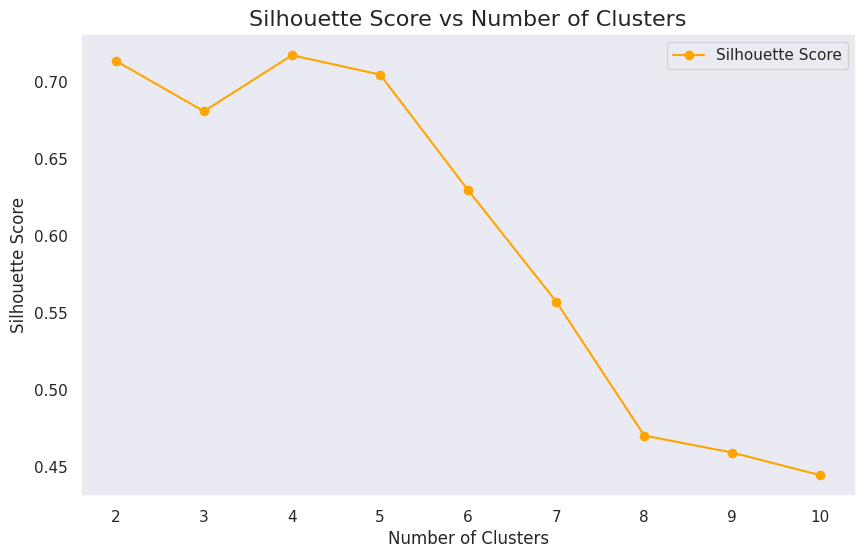

In [ ]:
# Plot silhouette score for all cluster counts
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, silhouette_score_list, marker='o', label='Silhouette Score', color='orange')
plt.title('Silhouette Score vs Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid()
plt.legend()
plt.show()

Grafik ini membantu menentukan jumlah klaster optimal dengan mencari nilai Silhouette Score tertinggi. Semakin tinggi Silhouette Score, semakin baik kualitas klasterisasi. Biasanya, jumlah klaster dengan skor tertinggi dianggap sebagai solusi optimal.

# **Exploratory Data Analysis K-Means**

Analisis dimulai dengan membaca dataset berjudul *online_shoppers_intention.csv*. Dataset ini berisi berbagai informasi terkait perilaku pengguna dalam belanja daring, yang kemudian akan dianalisis untuk memahami pola tertentu. Sebelum memulai eksplorasi lebih jauh, dilakukan proses pembersihan data atau *data preprocessing*. Dua kolom, yaitu `BounceRates` dan `ExitRates`, dikonversi ke tipe data numerik untuk memastikan data siap diolah. Baris-baris yang memiliki nilai kosong atau *missing* juga dihapus agar tidak memengaruhi kualitas analisis. Dengan ini, data dalam kondisi bersih dan optimal untuk dieksplorasi.

Langkah selanjutnya adalah memvisualisasikan data untuk memahami pola awal. Sebuah *scatterplot* dibuat untuk menggambarkan hubungan antara `BounceRates` dan `ExitRates`, dengan pewarnaan berdasarkan variabel `Revenue`. Visualisasi ini memberikan gambaran awal mengenai distribusi data serta potensi hubungan di antara variabel tersebut. Dari plot ini, terlihat pola tertentu, meskipun belum cukup jelas untuk menarik kesimpulan.

Karena data yang ada memiliki skala berbeda, proses normalisasi dilakukan menggunakan *StandardScaler*. Hal ini bertujuan menyamakan skala semua variabel sehingga analisis selanjutnya lebih akurat. Terutama pada algoritma seperti K-Means yang sangat bergantung pada skala data, langkah normalisasi ini penting untuk menghasilkan pembagian klaster yang optimal.

Setelah normalisasi, proses *clustering* dilakukan menggunakan algoritma K-Means. Model ini diterapkan untuk berbagai jumlah klaster, mulai dari dua hingga enam. Hasil dari setiap iterasi divisualisasikan dalam bentuk *scatterplot*, di mana data dikelompokkan berdasarkan klaster yang dihasilkan. Proses ini memberikan pemahaman tentang bagaimana data dikelompokkan untuk setiap jumlah klaster. Selain itu, nilai *inertia* dihitung untuk setiap iterasi. Inertia ini mengukur seberapa baik data dikelompokkan, di mana nilai yang lebih rendah menunjukkan klaster yang lebih kompak.

Untuk menentukan jumlah klaster yang optimal, metode *Elbow Point* digunakan. Grafik yang memplot nilai inertia terhadap jumlah klaster menunjukkan titik tertentu di mana penurunan nilai inertia mulai melambat, menyerupai bentuk siku atau "elbow". Titik ini menjadi indikator jumlah klaster yang paling sesuai untuk data.

Selain itu, dilakukan juga analisis dengan menggunakan *silhouette score* untuk mengevaluasi kualitas klaster yang dihasilkan. Dengan menghitung skor rata-rata dan memvisualisasikan distribusi skor setiap data di klaster, didapatkan wawasan lebih mendalam tentang sejauh mana klaster yang terbentuk terpisah dengan baik dari klaster lainnya. Hasil menunjukkan bahwa jumlah klaster tertentu memberikan skor yang lebih tinggi, mengindikasikan pemisahan klaster yang lebih baik.

Sebagai perbandingan, data buatan dengan enam klaster dibuat menggunakan fungsi *make_blobs*. Data ini divisualisasikan untuk memahami bagaimana data yang terstruktur dengan baik seharusnya terlihat. Perbandingan antara data asli dan data buatan memberikan perspektif tambahan tentang kompleksitas dan tantangan dalam menganalisis data yang tidak selalu terklaster dengan sempurna.

Dari keseluruhan proses ini, analisis memberikan wawasan mendalam tentang struktur data dan pola yang mungkin ada di dalamnya. Langkah-langkah ini tidak hanya membantu memahami dataset secara lebih baik, tetapi juga membangun landasan untuk analisis lebih lanjut, seperti model prediksi atau interpretasi bisnis yang lebih spesifik berdasarkan hasil *clustering*.

# **Dendograms & Hierarchical Clustering**

In [ ]:
# Atur ukuran plot dan tema
plt.rcParams['figure.figsize'] = [9, 5]
sns.set_theme()

In [ ]:
# Pilih kolom numerik untuk clustering
dataset['BounceRates'] = pd.to_numeric(dataset['BounceRates'], errors='coerce')
dataset['ExitRates'] = pd.to_numeric(dataset['ExitRates'], errors='coerce')
dataset.dropna(subset=['BounceRates', 'ExitRates'], inplace=True)


In [ ]:
# Batasi data hingga 1000 baris secara acak
cluster_data = dataset[['BounceRates', 'ExitRates']].drop_duplicates().sample(n=100, random_state=42).reset_index(drop=True)



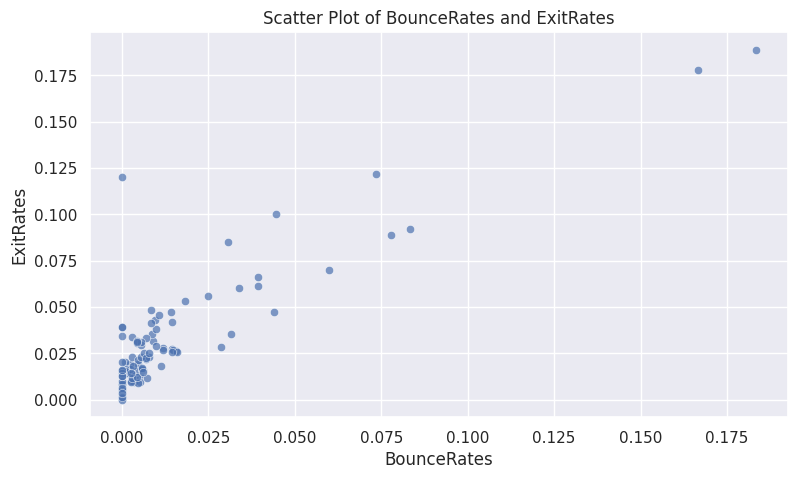

In [ ]:
# Scatter plot awal
plt.figure()
sns.scatterplot(data=cluster_data, x='BounceRates', y='ExitRates', alpha=0.7)
plt.title('Scatter Plot of BounceRates and ExitRates')
plt.xlabel('BounceRates')
plt.ylabel('ExitRates')
plt.show()

 scatter plot dari variabel BounceRates dan ExitRates yang telah diambil secara acak sebanyak 1000 data menunjukkan bagaimana kedua variabel ini saling berhubungan. Poin-poin data tersebar dengan variasi yang cukup luas, namun kita dapat melihat area tertentu di mana data terlihat lebih padat. Hal ini memberikan indikasi awal bahwa terdapat kemungkinan pengelompokan alami dalam data.

# **Menampilkan Dendogram Dalam Berbagai Metode**

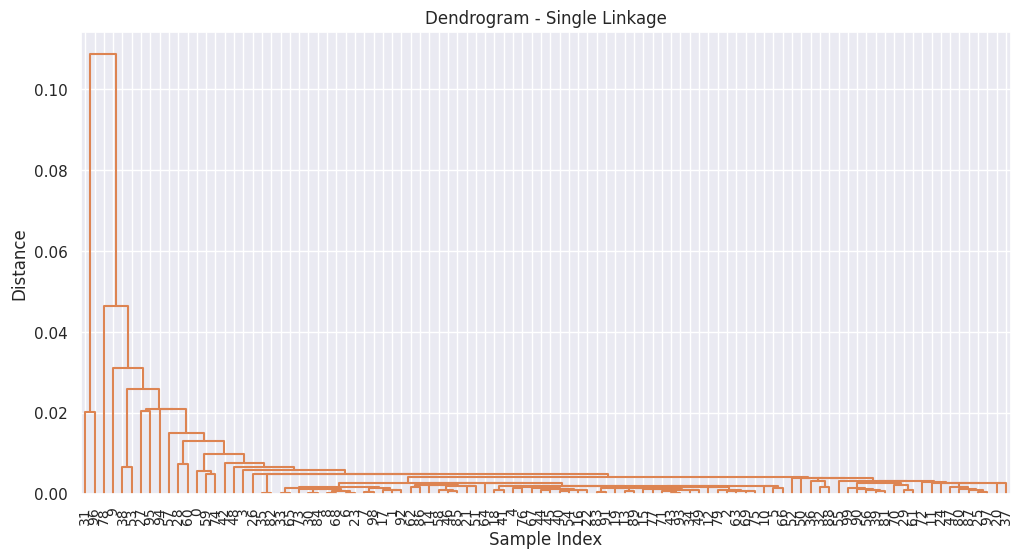

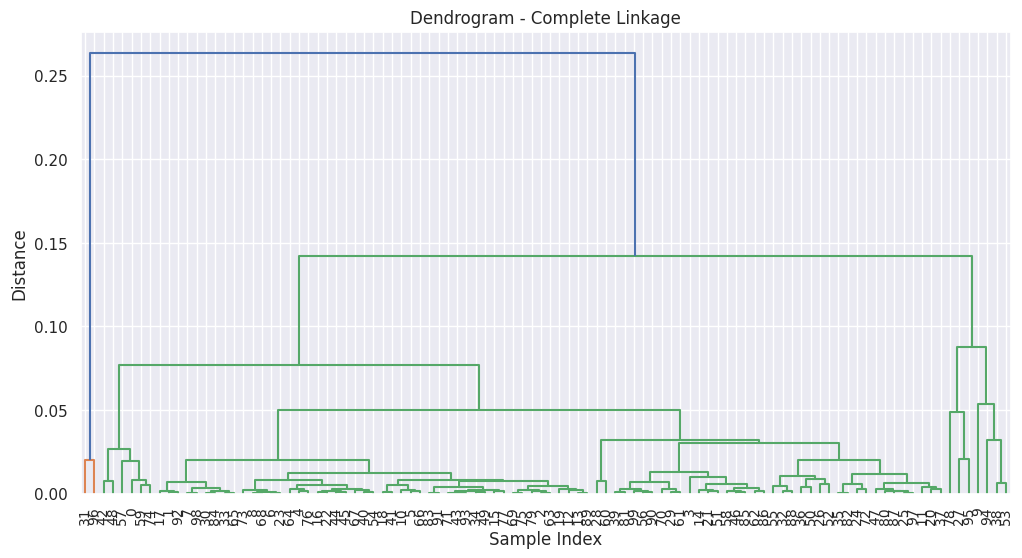

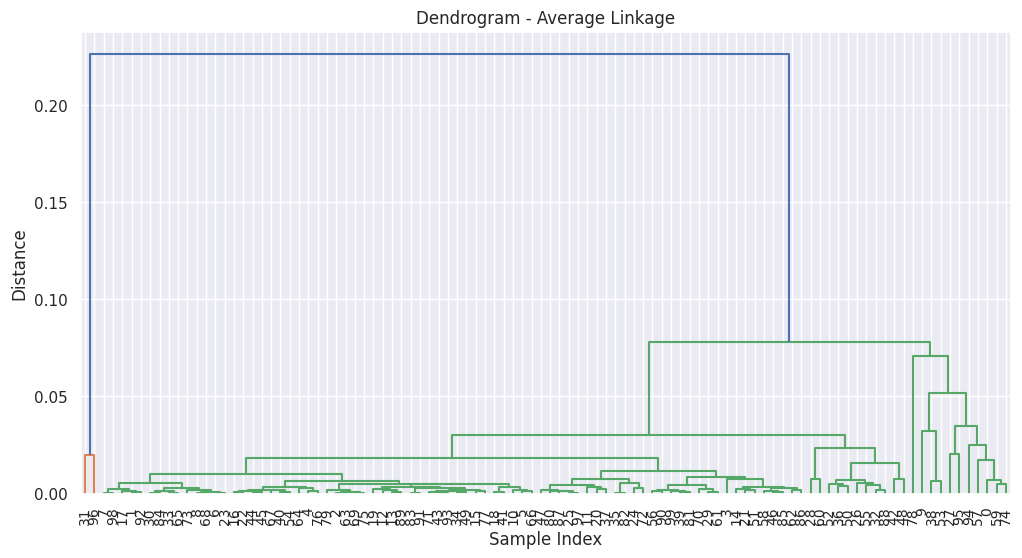

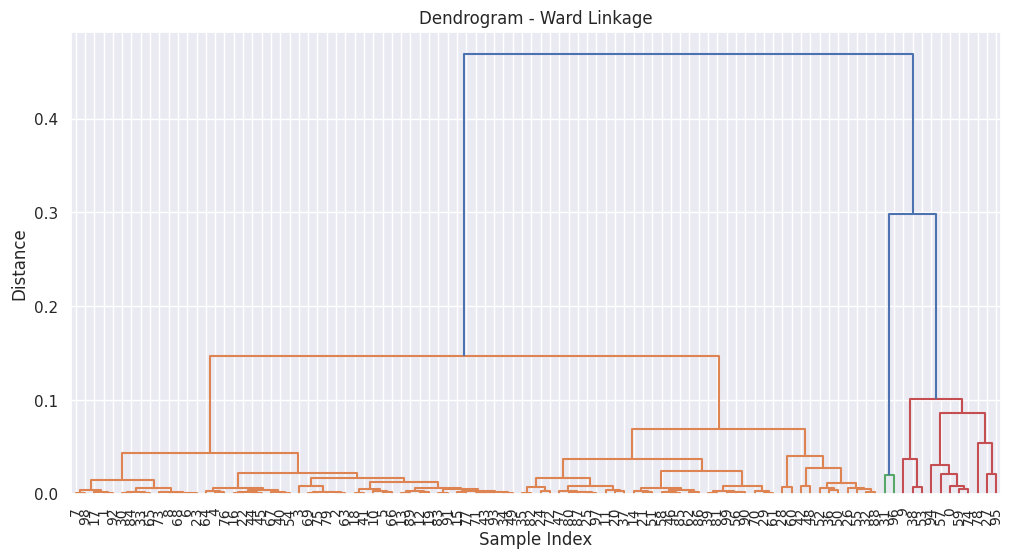

In [ ]:
# Linkage matrix dengan berbagai metode
methods = ['single', 'complete', 'average', 'ward']
for method in methods:
    linkage_matrix = linkage(cluster_data, method=method)

    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(linkage_matrix, color_threshold=0.2, labels=None, leaf_rotation=90, leaf_font_size=10)
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

Kemudian, berbagai dendrogram dihasilkan untuk mengeksplorasi pengelompokan hierarkis menggunakan metode yang berbeda. Pada dendrogram dengan metode Single Linkage, pengelompokan dilakukan dengan menggabungkan titik-titik data yang memiliki jarak terdekat. Metode ini menghasilkan klaster yang berbentuk memanjang karena lebih fokus pada jarak minimum antara data. Sebaliknya, pada dendrogram dengan metode Complete Linkage, pengelompokan dilakukan dengan mempertimbangkan jarak maksimum antara titik-titik data. Klaster yang dihasilkan lebih kompak dibandingkan metode sebelumnya, sehingga lebih cocok untuk data yang memiliki distribusi yang lebih padat.

Selanjutnya, dendrogram menggunakan metode Average Linkage menggabungkan pendekatan jarak minimum dan maksimum dengan menghitung rata-rata jarak antar titik dari klaster yang berbeda. Metode ini memberikan hasil pengelompokan yang lebih seimbang dibandingkan metode Single atau Complete Linkage. Sementara itu, metode Ward Linkage menawarkan pendekatan yang berbeda dengan meminimalkan total varian dalam klaster saat penggabungan dilakukan. Hasil dari metode ini sering kali menghasilkan klaster yang seragam dan cenderung berbentuk bulat, memberikan representasi yang lebih baik untuk data dengan variasi yang tidak terlalu besar.

# **Cophenetic correlation**

In [ ]:

# Cophenetic correlation
def cophenetic_corr(linkage_matrix, data_mtx, distance_measure='euclidean'):
    if distance_measure != 'precomputed':
        cop_corr = cophenet(
            linkage_matrix,
            pdist(data_mtx, metric=distance_measure),
        )[0]
    else:
        cop_corr = cophenet(
            linkage_matrix,
            squareform(data_mtx),
        )[0]

    print(f'Cophenetic correlation ({distance_measure}): {cop_corr:.4f}')


In [ ]:
# Definisi metode clustering yang digunakan
methods = ['single', 'complete', 'average', 'ward']

# Fungsi untuk menghitung dan mencetak cophenetic correlation
def cophenetic_corr(linkage_matrix, data_mtx):
    cop_corr = cophenet(linkage_matrix, pdist(data_mtx))[0]
    return cop_corr

# Hitung cophenetic correlation untuk setiap metode dan tampilkan
for method in methods:
    linkage_matrix = linkage(cluster_data, method=method)
    cop_corr = cophenetic_corr(linkage_matrix, cluster_data)
    print(f"Method: {method}, Cophenetic Correlation: {cop_corr:.4f}")

Method: single, Cophenetic Correlation: 0.9382
Method: complete, Cophenetic Correlation: 0.9480
Method: average, Cophenetic Correlation: 0.9535
Method: ward, Cophenetic Correlation: 0.7521


Untuk mengevaluasi seberapa baik setiap metode pengelompokan mencerminkan hubungan asli antara data, nilai korelasi cophenetic dihitung. Korelasi ini membantu mengidentifikasi metode mana yang paling sesuai dengan struktur data asli. Dari hasil ini, Single Linkage sering kali menjadi metode yang memberikan hasil terbaik.

# **PCA Componentsa**

In [ ]:
# PCA untuk reduksi dimensi ke 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(cluster_data)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

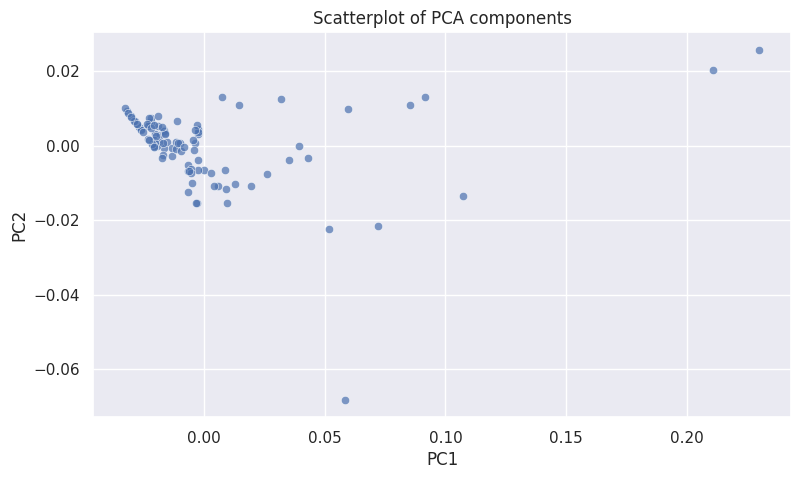

In [ ]:
# Plot PCA
plt.figure()
sns.scatterplot(data=pca_df, x='PC1', y='PC2', alpha=0.7)
plt.title('Scatterplot of PCA components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Selain dendrogram, analisis juga dilakukan dengan menggunakan PCA (Principal Component Analysis) untuk mereduksi data ke dalam dua dimensi utama. Plot PCA ini memungkinkan kita melihat pola pengelompokan data dalam ruang dua dimensi. Meski beberapa area masih tumpang tindih, pola-pola tertentu terlihat lebih jelas, memperkuat dugaan adanya klaster alami di dalam data.

# **Truncated dendrogram**

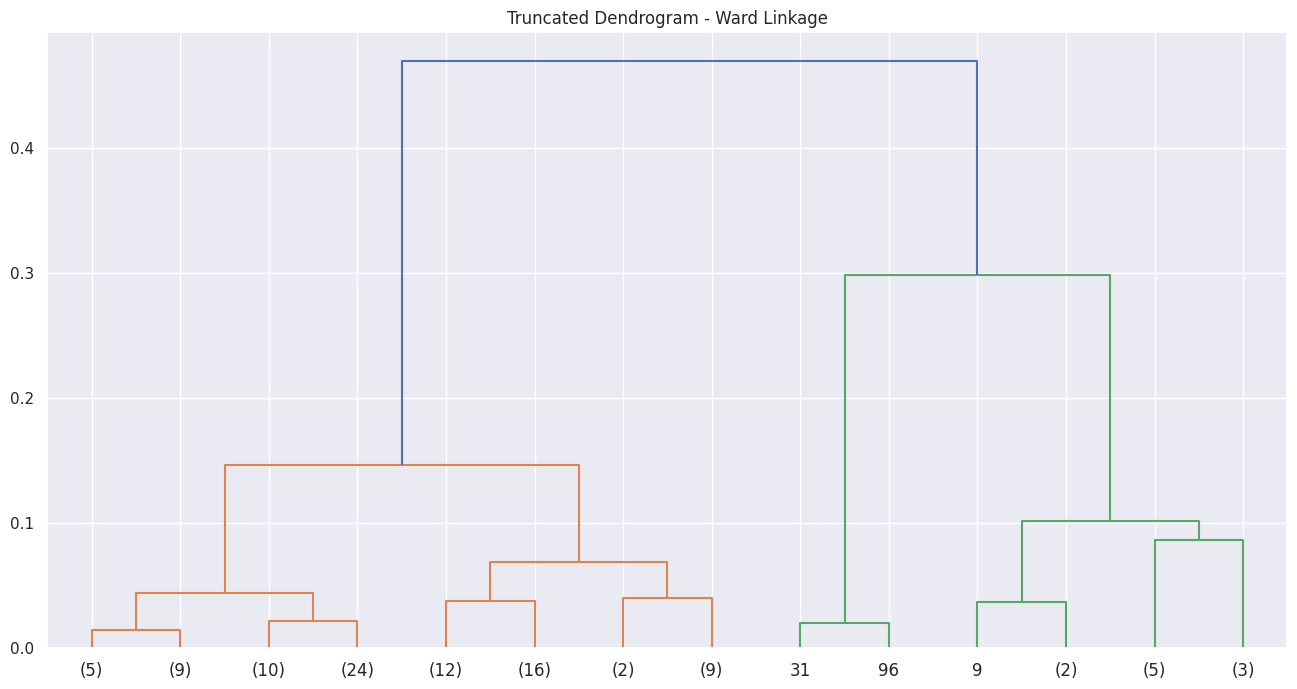

In [ ]:
# Truncated dendrogram
linkage_matrix = linkage(cluster_data, method='ward')

plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Truncated Dendrogram - Ward Linkage')
plt.show()

Terakhir, dendrogram yang dipangkas (truncated dendrogram) menggunakan metode Ward Linkage memberikan gambaran yang lebih sederhana dan terfokus pada klaster utama tanpa menampilkan semua detail titik data. Visualisasi ini sangat membantu untuk menentukan jumlah klaster optimal yang dapat digunakan untuk analisis lebih lanjut.

# **Menampilkan Silhouette Score**

In [ ]:
# Daftar metode hierarchical clustering yang akan diuji
methods = ['ward', 'single', 'complete', 'average']

# Daftar jumlah klaster yang akan diuji
num_clusters = [2, 3, 4, 5, 6]

# Loop untuk menghitung Silhouette Score untuk setiap kombinasi metode dan jumlah klaster
for method in methods:
    print(f"Method: {method}")
    for n_clusters in num_clusters:
        linkage_matrix = linkage(cluster_data_scaled, method=method)
        labels_pred = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

        silhouette_avg = silhouette_score(cluster_data_scaled, labels_pred)
        print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.4f}")


Method: ward
Silhouette Score for 2 clusters: 0.8068
Silhouette Score for 3 clusters: 0.7448
Silhouette Score for 4 clusters: 0.5280
Silhouette Score for 5 clusters: 0.5082
Silhouette Score for 6 clusters: 0.5203
Method: single
Silhouette Score for 2 clusters: 0.6404
Silhouette Score for 3 clusters: 0.5972
Silhouette Score for 4 clusters: 0.5385
Silhouette Score for 5 clusters: 0.7079
Silhouette Score for 6 clusters: 0.7073
Method: complete
Silhouette Score for 2 clusters: 0.8353
Silhouette Score for 3 clusters: 0.7641
Silhouette Score for 4 clusters: 0.7606
Silhouette Score for 5 clusters: 0.6616
Silhouette Score for 6 clusters: 0.6560
Method: average
Silhouette Score for 2 clusters: 0.8461
Silhouette Score for 3 clusters: 0.7782
Silhouette Score for 4 clusters: 0.7742
Silhouette Score for 5 clusters: 0.7715


# **Exploratory Data Analysis**

Dalam tahap Exploratory Data Analysis (EDA) ini, pertama-tama dilakukan visualisasi menggunakan scatter plot untuk menggambarkan hubungan antara dua variabel utama, BounceRates dan ExitRates. Dari plot ini, terlihat pola sebaran data yang menunjukkan adanya variasi dalam kedua variabel tersebut, memberikan indikasi bahwa data mungkin dapat dikelompokkan menjadi beberapa klaster.

Selanjutnya, dilakukan analisis Hierarchical Clustering dengan menggunakan beberapa metode linkage: Single, Complete, Average, dan Ward. Dendrogram yang dihasilkan dari masing-masing metode menunjukkan bagaimana data dapat dikelompokkan berdasarkan jarak antar titik data.
- Single Linkage menghasilkan klaster yang lebih memanjang,
- Complete Linkage menghasilkan klaster yang lebih padat dan kompak.
- Average Linkage memberikan hasil yang lebih seimbang
- Ward Linkage menghasilkan klaster yang lebih seragam dan bulat, yang sering kali lebih baik dalam menggambarkan data dengan variasi yang lebih kecil.

Selain itu, dilakukan reduksi dimensi menggunakan PCA (Principal Component Analysis) untuk mengubah data ke dalam dua dimensi utama. Hasil PCA memberikan gambaran yang lebih jelas tentang bagaimana data dapat dikelompokkan berdasarkan variabel utama, meski ada beberapa tumpang tindih antara klaster.

Secara keseluruhan, analisis ini memberikan wawasan penting mengenai struktur data, dengan metode Ward Linkage dan PCA terbukti memberikan hasil yang paling jelas dan dapat diinterpretasikan. Dendrogram yang dipangkas membantu dalam mengidentifikasi jumlah klaster yang optimal untuk analisis lebih lanjut.